In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import numpy as np
import os
import sys
import seaborn as sns


import pylab as pl

In [72]:
os.listdir()

['data.py', 'mr_eda.ipynb', '.ipynb_checkpoints', 'analysis.py', 'features.py']

In [74]:
fp = '/teams/DSC180A_FA20_A00/b05vpnxray/group2_data/data'
filelist = os.listdir(fp)

In [4]:
def label_identifyer(x):
    if 'netflix' in x:
        return 'Netflix'
    if 'prime' in x:
        return 'Amazon Prime'
    if 'youtube' in x:
        return 'Youtube'
    else:
        return 'Other'

In [75]:
filelist

['jeq004_netflix_1080p_1x_vpn_mac_clean_20210106b-8.csv',
 'jeq004_netflix_1080p_1x_vpn_mac_clean_20210107-16.csv',
 'jeq004_netflix_1080p_1x_vpn_mac_clean_20210105-9.csv',
 'jeq004_discovery_1080p_1x_vpn_mac_clean_20210125-8.csv',
 'chang_amazonprime_3.csv',
 'jeq004_netflix_1080p_1x_vpn_mac_clean_20210104-27.csv',
 'chang_amazonprime_4.csv',
 'jeq004_netflix_1080p_1x_vpn_mac_clean_20210104-20.csv',
 'jeq004_netflix_1080p_1x_vpn_mac_clean_20210106b-20.csv',
 'jeq004_netflix_1080p_1x_vpn_mac_clean_20210107-11.csv',
 'chang_amazonprime_24.csv',
 'arv020_hulu_1080p_1x_vpn_mac_clean_15.csv',
 'jeq004_netflix_1080p_1x_vpn_mac_clean_20210106b-1.csv',
 'jeq004_youtube_1080p_1x_vpn_mac_clean_20210109-2.csv',
 'jeq004_netflix_1080p_1x_vpn_mac_clean_20210105-0.csv',
 'jeq004_discovery_1080p_1x_vpn_mac_clean_20210125-1.csv',
 'jeq004_netflix_1080p_1x_vpn_mac_clean_20210106b-6.csv',
 'jeq004_youtube_1080p_1x_vpn_mac_clean_20210109-5.csv',
 'jeq004_netflix_1080p_1x_vpn_mac_clean_20210107-18.csv',


In [5]:
def table_output_col(df):
    df['output'] = df['Input'].apply(label_identifyer)
    return df

In [6]:
df = pd.DataFrame({"Input": filelist})
df = table_output_col(df)

In [7]:
ap_df = df[df['output'] == 'Amazon Prime']
nx_df = df[df['output'] == 'Netflix']
yt_df = df[df['output'] == 'Youtube']

In [8]:
mb=1000000

In [76]:
netflix_files = [f for f in filelist if 'netflix' in f]
prime_files = [f for f in filelist if 'prime' in f]
youtube_files = [f for f in filelist if 'youtube' in f]
disney_files=[f for f in filelist if 'disney' in f]
discovery_files=[f for f in filelist if 'discovery' in f]
hulu_files=[f for f in filelist if 'hulu' in f]

In [80]:
len(hulu_files)

35

In [10]:
netflix_mean=[]
for x in range(len(netflix_files)):

    y=pd.read_csv(os.path.join(fp, netflix_files[x]))['2->1Bytes']/mb
    netflix_mean.append(np.mean(y))

In [11]:
youtube_mean=[]
for x in range(len(youtube_files)):

    y=pd.read_csv(os.path.join(fp, youtube_files[x]))['2->1Bytes']/mb
    youtube_mean.append(np.mean(y))

In [12]:
prime_mean=[]
for x in range(len(prime_files)):

    y=pd.read_csv(os.path.join(fp, prime_files[x]))['2->1Bytes']/mb
    prime_mean.append(np.mean(y))

[Text(0, 0, 'Netflix'), Text(0, 0, 'Youtube'), Text(0, 0, 'Amazon')]

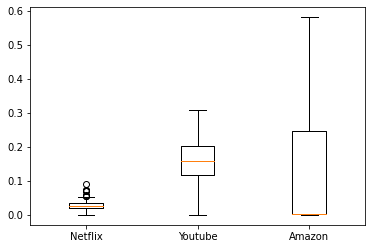

In [13]:
my_dict = {'Netflix': netflix_mean, 'Youtube': youtube_mean, "Amazon":prime_mean}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

In [14]:
len(prime_mean)

100

Text(0.5, 1.0, 'Download Rates of Netflix')

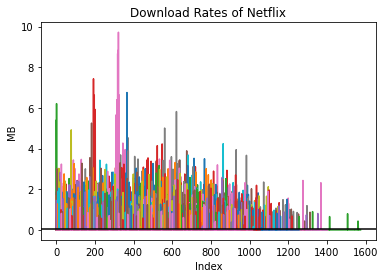

In [15]:
for x in range(len(netflix_files)):
    plt.plot(pd.read_csv(os.path.join(fp, netflix_files[x]))['2->1Bytes']/mb)
plt.axhline(y=(28618.789651557116/mb), color="black")
plt.xlabel("Index")
plt.ylabel("MB")
plt.title("Download Rates of Netflix")

Text(0.5, 1.0, 'Upload Rates of Netflix')

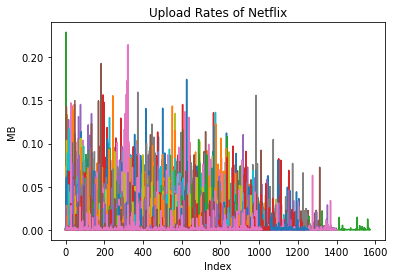

In [16]:
for x in range(len(netflix_files)):
    plt.plot(pd.read_csv(os.path.join(fp, netflix_files[x]))['1->2Bytes']/mb)

plt.xlabel("Index")
plt.ylabel("MB")
plt.title("Upload Rates of Netflix")

Text(0.5, 1.0, 'Download Rates of Youtube')

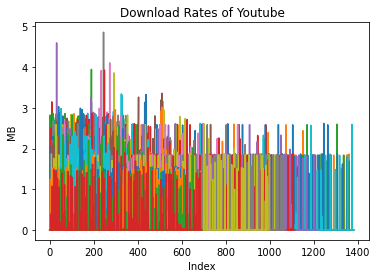

In [17]:
for x in range(len(youtube_files)):
    plt.plot(pd.read_csv(os.path.join(fp, youtube_files[x]))['2->1Bytes']/mb)
plt.xlabel("Index")
plt.ylabel("MB")
plt.title("Download Rates of Youtube")

Text(0.5, 1.0, 'Upload Rates of Youtube')

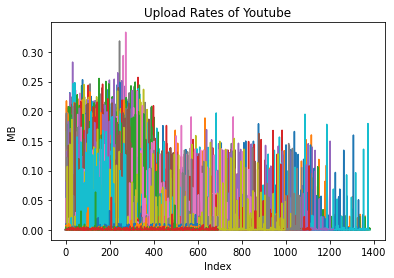

In [18]:
for x in range(len(youtube_files)):
    plt.plot(pd.read_csv(os.path.join(fp, youtube_files[x]))['1->2Bytes']/mb)
plt.xlabel("Index")
plt.ylabel("MB")
plt.title("Upload Rates of Youtube")

Text(0.5, 1.0, 'Download Rates of Amazon Prime')

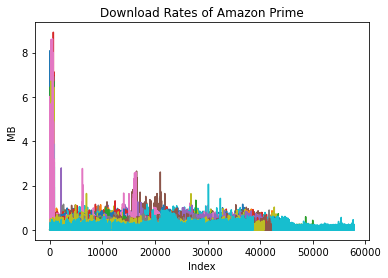

In [19]:
for x in range(len(prime_files)):
    plt.plot(pd.read_csv(os.path.join(fp, prime_files[x]))['2->1Bytes']/mb)
plt.xlabel("Index")
plt.ylabel("MB")
plt.title("Download Rates of Amazon Prime")

Text(0.5, 1.0, 'Upload Rates of Amazon Prime')

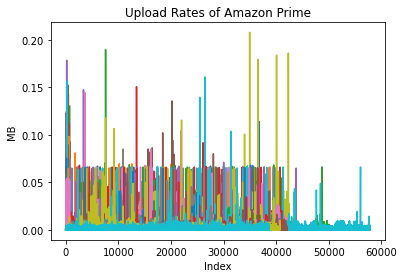

In [20]:
for x in range(len(prime_files)):
    plt.plot(pd.read_csv(os.path.join(fp, prime_files[x]))['1->2Bytes']/mb)
plt.xlabel("Index")
plt.ylabel("MB")
plt.title("Upload Rates of Amazon Prime")

In [21]:
all_df=[]

In [22]:
df_netflix=[]
for x in range(len(netflix_files)):

    y=pd.read_csv(os.path.join(fp, netflix_files[x]))
    y["provider"]="netflix"
    all_df.append(y)
    df_netflix.append(y)

In [23]:
df_youtube=[]
for x in range(len(youtube_files)):

    y=pd.read_csv(os.path.join(fp, youtube_files[x]))
    y["provider"]="youtube"
    all_df.append(y)
    df_youtube.append(y)

In [24]:
df_amazon=[]
for x in range(len(prime_files)):

    y=pd.read_csv(os.path.join(fp, prime_files[x]))
    y["provider"]="amazon"
    all_df.append(y)
    df_amazon.append(y)

In [83]:
other_files=disney_files+discovery_files+hulu_files

In [85]:
df_other=[]
for x in range(len(other_files)):

    y=pd.read_csv(os.path.join(fp, other_files[x]))
    y["provider"]="other"
    all_df.append(y)
    df_other.append(y)

In [86]:
df=all_df[0]

for x in range(1,len(all_df)):
    df=pd.concat([df, all_df[x]])

KeyboardInterrupt: 

In [26]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [27]:
df

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs,provider
0,1609997815,192.168.1.230,54915,192.168.1.255,54915,17,291,0,1,0,1609997815467;,291;,1;,netflix
1,1609997815,192.168.1.191,60553,137.110.0.69,443,17,1463,1218,8,7,1609997815532;1609997815533;1609997815566;1609...,288;278;118;118;184;253;118;118;270;157;118;11...,1;1;2;2;2;2;1;1;2;2;1;1;1;2;1;,netflix
2,1609997815,192.168.1.251,5353,224.0.0.251,5353,17,242,0,1,0,1609997815879;,242;,1;,netflix
3,1609997815,FE80::C37:1665:F5AB:BEAD,5353,FF02::FB,5353,17,262,0,1,0,1609997815879;,262;,1;,netflix
4,1609997815,192.168.1.21,5353,224.0.0.251,5353,17,1978,0,2,0,1609997815980;1609997815980;,1479;499;,1;1;,netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38668,1609899205,FE80::DA:EF9:2104:939,5353,FF02::FB,5353,17,170,0,1,0,1609899205906;,170;,1;,amazon
38669,1609899205,100.112.90.161,5353,224.0.0.251,5353,17,200,0,1,0,1609899205906;,200;,1;,amazon
38670,1609899205,FE80::189C:8BDF:B644:8B48,5353,FF02::FB,5353,17,220,0,1,0,1609899205907;,220;,1;,amazon
38671,1609899205,100.112.80.80,5353,224.0.0.251,5353,17,580,0,1,0,1609899205908;,580;,1;,amazon


In [28]:
df.columns

Index(['Time', 'IP1', 'Port1', 'IP2', 'Port2', 'Proto', '1->2Bytes',
       '2->1Bytes', '1->2Pkts', '2->1Pkts', 'packet_times', 'packet_sizes',
       'packet_dirs', 'provider'],
      dtype='object')

In [88]:
replace={"netflix":1,"amazon":2,"youtube":3,"other":4}

In [30]:
df1=df.replace(replace)

In [64]:
X=df1[['1->2Bytes','2->1Bytes', '1->2Pkts', '2->1Pkts']]
y=df1["provider"]

KeyError: "None of [Index(['1->2Bytes', '2->1Bytes', '1->2Pkts', '2->1Pkts'], dtype='object')] are in the [columns]"

In [65]:
df1.columns

Index(['max_up', 'max_down', 'min_up', 'min_down', 'mean_up', 'mean_down',
       'provider'],
      dtype='object')

In [91]:
X=df1[['max_up', 'max_down', 'min_up', 'min_down', 'mean_up', 'mean_down']]
y=df1["provider"]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [93]:
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [94]:
regr.score(X_test,y_test)

0.9044698889412619

In [96]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(max_depth=4, random_state=0,n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()

array([False, False, False, False,  True,  True])

In [97]:
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['mean_up', 'mean_down'], dtype='object')


In [35]:
df_stats.iloc[0]

NameError: name 'df_stats' is not defined

In [47]:
df_test=all_df[0]
df_test
df_stats=df_test[['1->2Bytes','2->1Bytes']].agg(["max", "min", "mean"])
max_up=df_stats.iloc[0][0]
max_down=df_stats.iloc[0][1]
min_down=df_stats.iloc[1][0]
min_up=df_stats.iloc[1][1]
mean_up=df_stats.iloc[2][0]
df_test["provider"]
mean_down=df_stats.iloc[2][1]
column1=["max_up","max_down","min_up","min_down","mean_up","mean_down","provider"]
row=pd.DataFrame(columns=column1,data=[[max_up,max_down,min_up,min_down,mean_up,mean_down,df_test["provider"][0]]])

In [48]:
row

,max_up,max_down,min_up,min_down,mean_up,mean_down,provider
0,112237.0,2316987.0,0.0,0.0,1518.02906,24302.12906,netflix


In [87]:
rows=[]
column1=["max_up","max_down","min_up","min_down","mean_up","mean_down","provider"]
for x in range(len(all_df)):
    df_test=all_df[x]
    df_stats=df_test[['1->2Bytes','2->1Bytes']].agg(["max", "min", "mean"])
    max_up=df_stats.iloc[0][0]
    max_down=df_stats.iloc[0][1]
    min_down=df_stats.iloc[1][0]
    min_up=df_stats.iloc[1][1]
    mean_up=df_stats.iloc[2][0]
    df_test["provider"]
    mean_down=df_stats.iloc[2][1]
    
    row=[max_up,max_down,min_up,min_down,mean_up,mean_down,df_test["provider"][0]]
    rows.append(row)
    
    

In [89]:
df=pd.DataFrame(columns=column1, data=rows)

In [90]:
df1=df.replace(replace)

In [63]:
df1

,max_up,max_down,min_up,min_down,mean_up,mean_down,provider
0,112237.0,2316987.0,0.0,0.0,1518.029060,24302.129060,1
1,103271.0,1788874.0,0.0,0.0,3176.913043,56233.706004,1
2,56624.0,1237569.0,0.0,0.0,1467.028815,19241.935966,1
3,118675.0,4144126.0,0.0,0.0,1827.308564,39797.935768,1
4,53216.0,1435667.0,0.0,32.0,1183.149362,16961.806922,1
...,...,...,...,...,...,...,...
376,85250.0,984563.0,0.0,0.0,635.807130,2646.587511,2
377,54805.0,8616776.0,0.0,0.0,2843.142098,359407.355910,2
378,66098.0,815280.0,0.0,0.0,651.923517,3155.964799,2
379,106773.0,1640870.0,0.0,0.0,641.471916,2165.298868,2


In [ ]:

import pandas as pd
import numpy as np
import os
import regex as re
import combine_output from data_clean
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split




In [ ]:
{
    "max_depth":4,
    "random_state":0,
    "n_estimators" :100

}

In [ ]:
def model(data, model_configs):
    x=data
    x=x[x['vpn']==True]
    

    clf = RandomForestClassifier(max_depth=4, random_state=0,n_estimators =100)
    X=x.drop(["video"],axis=1)
    X.fillna(0,inplace=True)
    y=x["video"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf.fit(X_train, y_train)
    score=clf.score(X_test,y_test)
    print("Classifier score is", score)
    return score
